# Imports

In [20]:
import itertools
import numpy as np
import os
import pandas as pd
import plotnine as gg
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import spearmanr
gg.theme_set(gg.theme_classic)

plotnine.themes.theme_classic.theme_classic

In [2]:
from Functions import get_ages_cols, get_param_names, get_category_dict

## Directories etc.

In [3]:
data_save_path = "C:/Users/maria/MEGAsync/SLCNdata/Meta/all_data"
plot_save_path = "C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots"
if not os.path.exists(plot_save_path):
    os.makedirs(plot_save_path)

# Get data

In [4]:
ages_cols = get_ages_cols()
param_names = get_param_names()
category_dict = get_category_dict()

In [5]:
all_data = pd.read_csv(os.path.join(data_save_path, 'all_data.csv'), index_col=0)
all_data_z = pd.read_csv(os.path.join(data_save_path, 'all_data_z.csv'), index_col=0)
all_data_long = pd.read_csv(os.path.join(data_save_path, 'all_data_long.csv'), index_col=0)
all_data_long_z = pd.read_csv(os.path.join(data_save_path, 'all_data_long_z.csv'), index_col=0)

## Features over age

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 15 x 15 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\1_FeaturesOverAge.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


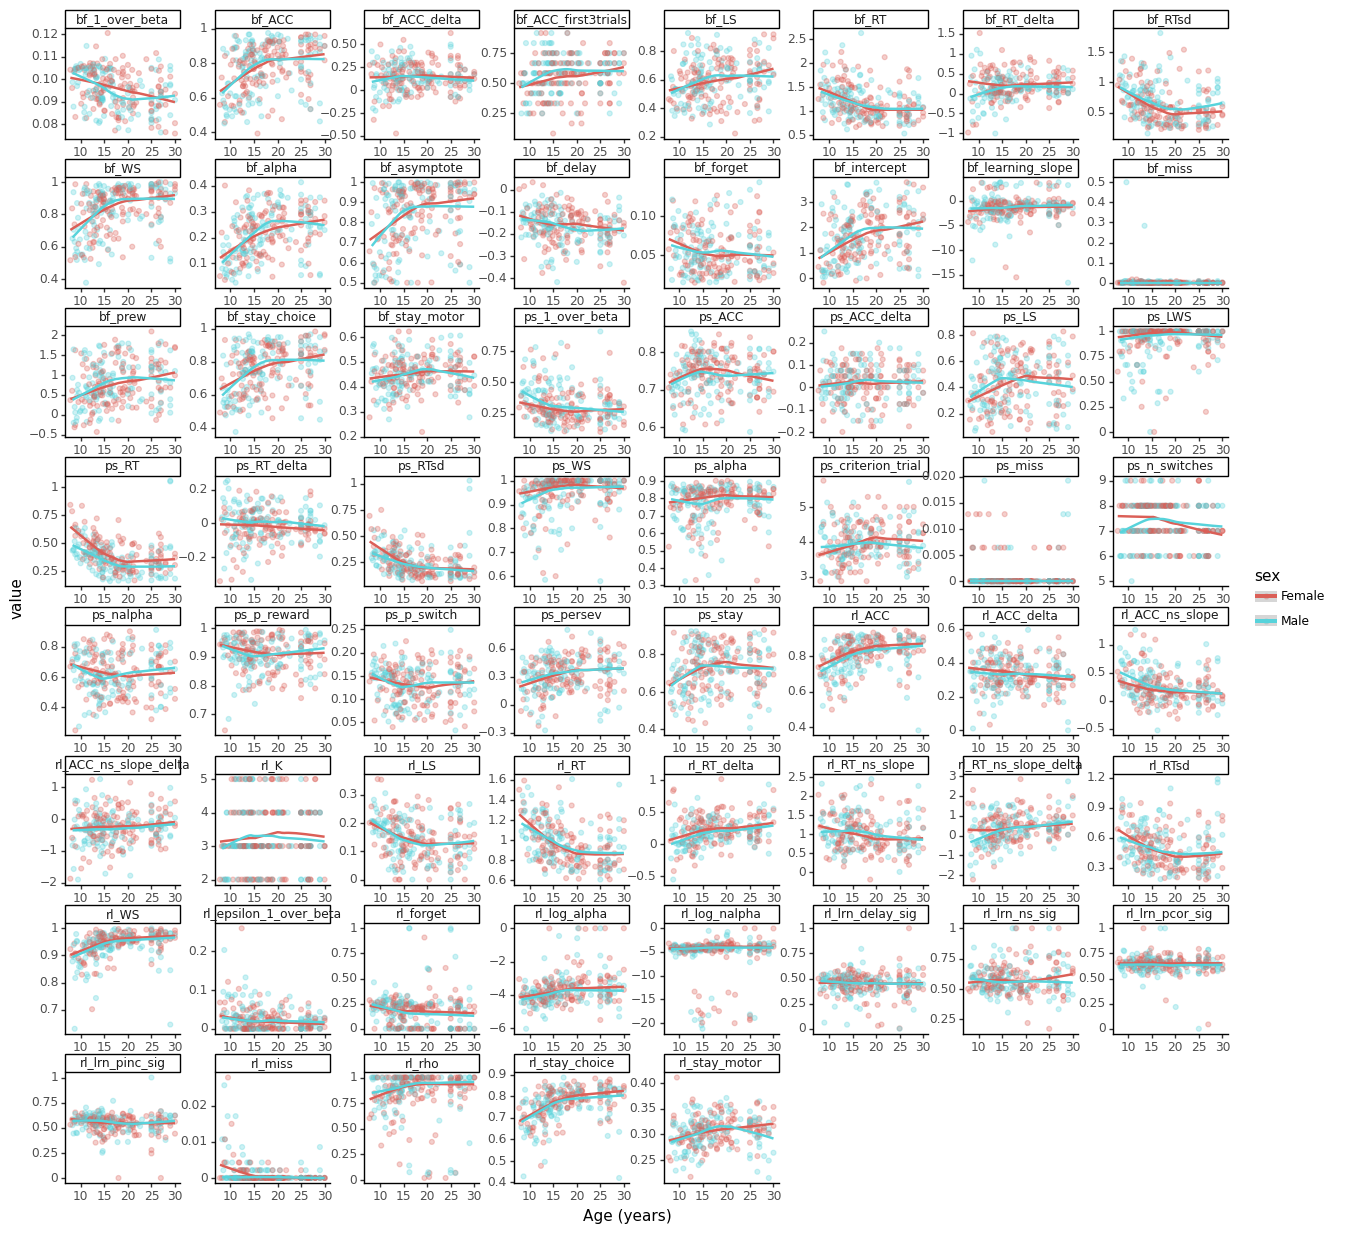

<ggplot: (106612947779)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 15 x 15 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\1_FeaturesOverAgeGroup.png


KeyboardInterrupt: 

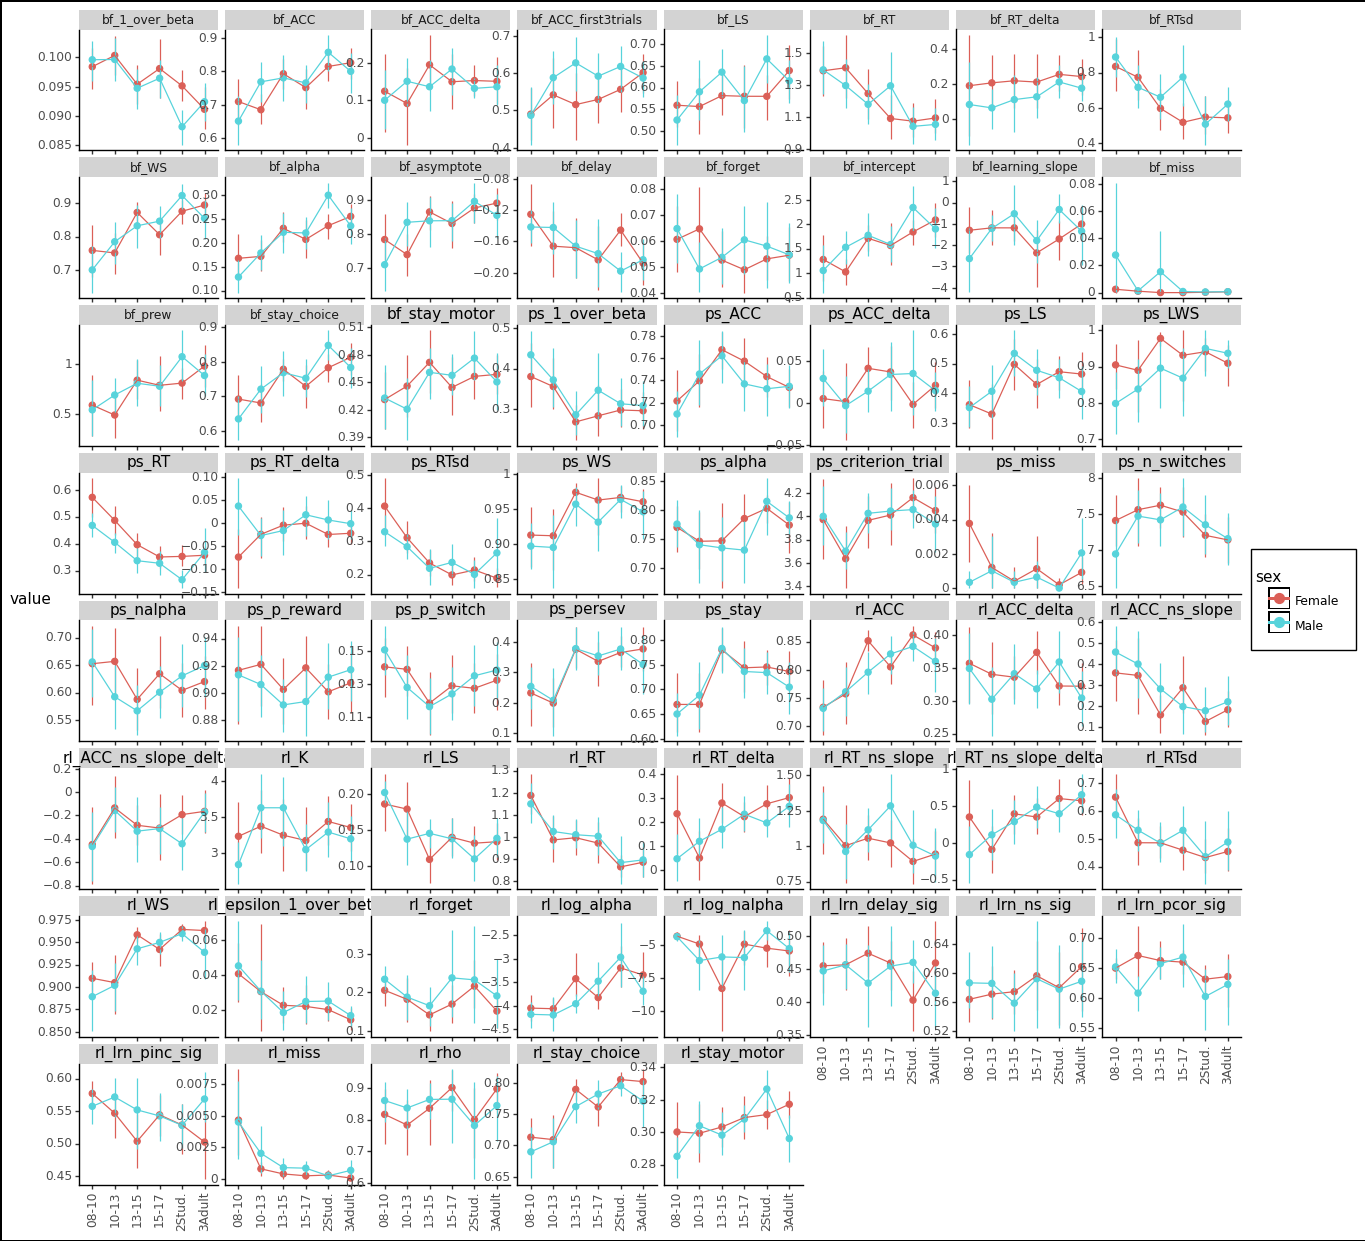

In [6]:
gg.options.figure_size = (15, 15)
g_age = (gg.ggplot(all_data_long, gg.aes('PreciseYrs', 'value', color='sex'))
     + gg.geom_point(alpha=0.3)
     + gg.geom_smooth()
     + gg.labs(x='Age (years)')
     + gg.theme(subplots_adjust={'hspace': 0.35, 'wspace': 0.3})
     + gg.facet_wrap('~ feature', scales='free')
    )
g_age.save(os.path.join(plot_save_path, '1_FeaturesOverAge.png'))
print(g_age)

g_agegroup = (gg.ggplot(all_data_long, gg.aes('factor(age_group_)', 'value', color='sex', group='sex'))
     + gg.stat_summary()
     + gg.stat_summary(geom='line')
     + gg.labs(x='')
     + gg.theme(axis_text_x=gg.element_text(rotation=90, hjust=0.5))
     + gg.theme(subplots_adjust={'hspace': 0.35, 'wspace': 0.3})
     + gg.facet_wrap('~ feature', scales='free')
    )
g_agegroup.save(os.path.join(plot_save_path, '1_FeaturesOverAgeGroup.png'))
print(g_agegroup)

In [ ]:
# def my_smoother(data, xseq, **params):
#     # * data - has the x and y values for the model
#     # * xseq - x values to be predicted
#     # * params - stat parameters
#     #
#     # It must return a new dataframe. Below is the
#     # template used internally by Plotnine

#     # Input data into the model
#     x, y = data['x'], data['y']

#     # Create and fit a model
#     model = Model(x, y)
#     results = Model.fit()

#     # Create output data by getting predictions on
#     # the xseq values
#     data = pd.DataFrame({
#         'x': xseq,
#         'y': results.predict(xseq)})

#     # Compute confidence intervals, this depends on
#     # the model. However, given standard errors and the
#     # degrees of freedom we can compute the confidence
#     # intervals using the t-distribution.
#     #
#     # For an alternative, implement confidence interals by
#     # the bootstrap method
#     if params['se']:
#         from plotnine.utils.smoothers import tdist_ci
#         y = data['y']            # The predicted value
#         df = 123                 # Degrees of freedom
#         stderr = results.stderr  # Standard error
#         level = params['level']  # The parameter value
#         low, high = tdist_ci(y, df, stderr, level)
#         data['se'] = stderr
#         data['ymin'] = low
#         data['ymax'] = high

#     return data

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 10 x 10 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\1_GroupedFeaturesOverAge.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 10 x 10 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\1_GroupedFeaturesOverAgeGroup.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


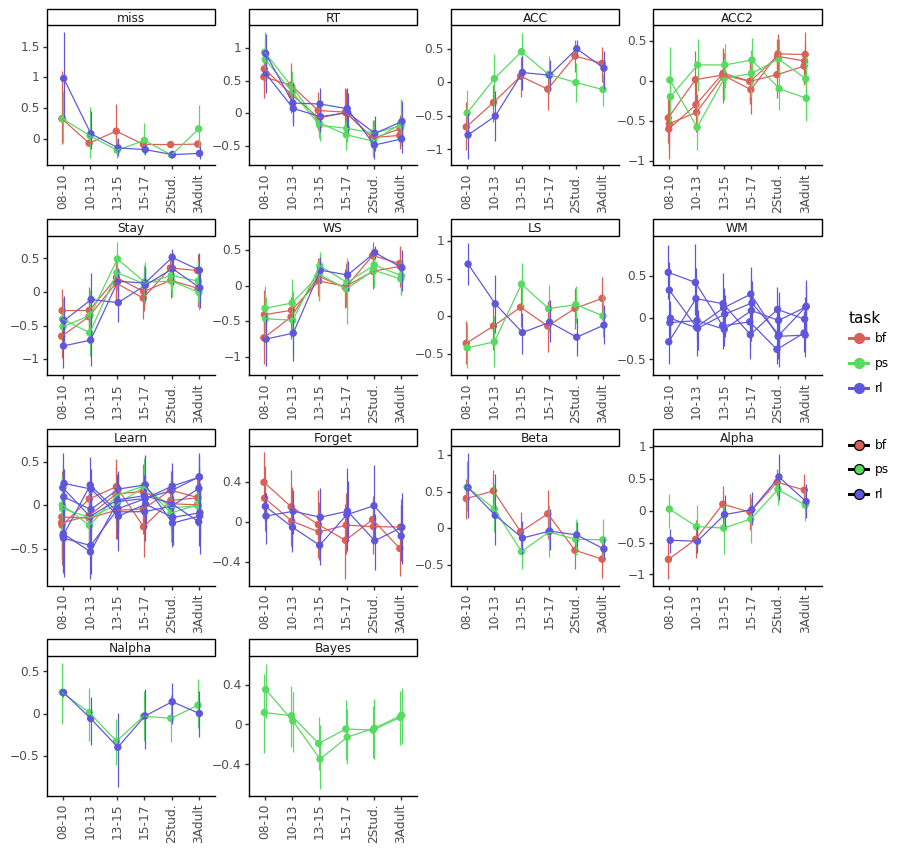

<ggplot: (106621385310)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 10 x 10 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\1_GroupedFeaturesOverAge_z.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


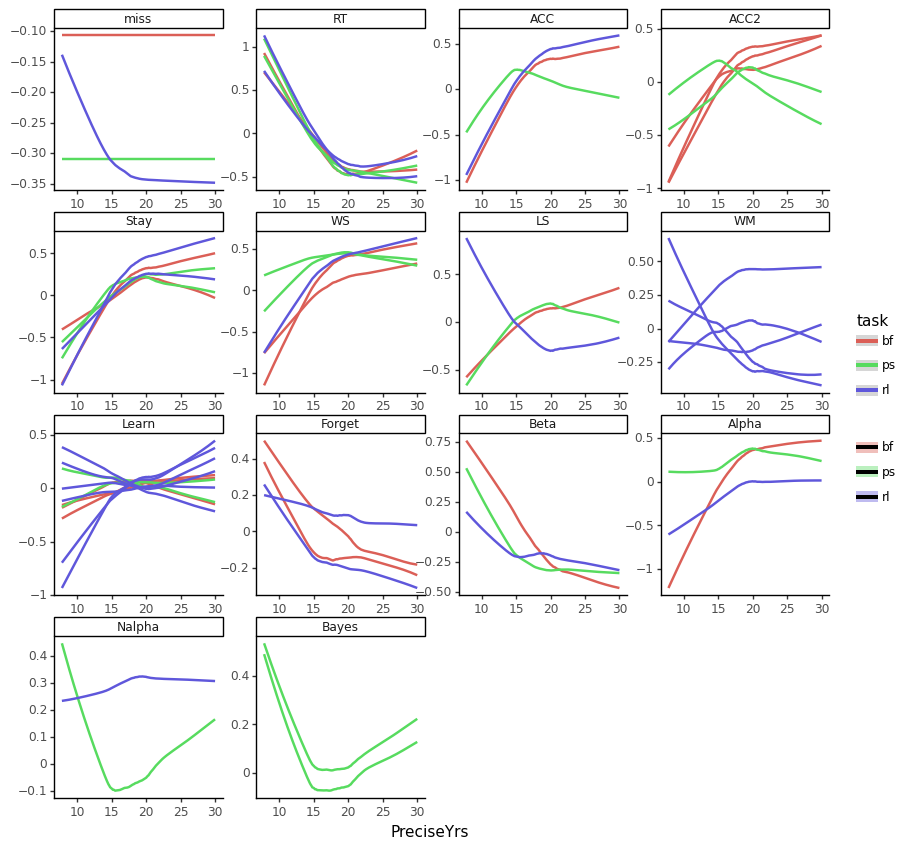

<ggplot: (106612954790)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 10 x 10 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\1_GroupedFeaturesOverAgeGroup_z.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


In [50]:
# Feature groups over age
gg.options.figure_size = (10, 10)

# 'auto'       # Use loess if (n<1000), glm otherwise
# 'lm', 'ols'  # Linear Model
# 'wls'        # Weighted Linear Model
# 'rlm'        # Robust Linear Model
# 'glm'        # Generalized linear Model
# 'gls'        # Generalized Least Squares
# 'lowess'     # Locally Weighted Regression (simple)
# 'loess'      # Locally Weighted Regression
# 'mavg'       # Moving Average
# 'gpr'        # Gaussian Process Regressor

# Sort categories for panels
all_data_long_z['category'] = pd.Categorical(all_data_long_z['category']).reorder_categories(list(category_dict.keys()))
all_data_long['category'] = pd.Categorical(all_data_long['category']).reorder_categories(list(category_dict.keys()))

# Foundation for non-z-scored and z-scored version of the plot
group_base = (
    gg.ggplot(gg.aes('age_group_', 'value', group='feature', color='task', fill='task'))
    + gg.stat_summary(position=gg.position_dodge(width=0.1))
    + gg.stat_summary(geom='line', position=gg.position_dodge(width=0.1))
    + gg.labs(x='', y='', color='', fill='')
#     + theme(axis.title.x=element_blank(),
#         axis.text.x=element_blank(),
#         axis.ticks.x=element_blank())
    + gg.theme(axis_text_x=gg.element_text(rotation=90, hjust=0.5))
    + gg.theme(subplots_adjust={'hspace': 0.5, 'wspace': 0.2})
    + gg.facet_wrap('~ category', scales='free')
)
cont_base = (
    gg.ggplot(gg.aes('PreciseYrs', 'value', group='feature', color='task', fill='task'))
#      + gg.stat_smooth(method='lm', formula='y ~ x + np.power(x, 2)')  #  + np.power(x, 3) + np.power(x, 4)
    + gg.geom_smooth()  # see above for options
    + gg.labs(y='', color='', fill='')
    + gg.theme(subplots_adjust={'hspace': 0.25, 'wspace': 0.2})
    + gg.facet_wrap('~ category', scales='free')
)

# Non-z-scored
group_g = group_base + gg.aes(color='task')
group_g.data = all_data_long
group_g.save(os.path.join(plot_save_path, '1_GroupedFeaturesOverAge.png'))

cont_g = cont_base + gg.aes(color='task')
cont_g.data = all_data_long
cont_g.save(os.path.join(plot_save_path, '1_GroupedFeaturesOverAgeGroup.png'))

# Z-scored
group_g_z = group_base + gg.aes(color='task')
group_g_z.data = all_data_long_z
print(group_g_z)
group_g_z.save(os.path.join(plot_save_path, '1_GroupedFeaturesOverAge_z.png'))

cont_g_z = cont_base + gg.aes(color='task')
cont_g_z.data = all_data_long_z
print(cont_g_z)
cont_g_z.save(os.path.join(plot_save_path, '1_GroupedFeaturesOverAgeGroup_z.png'))

In [131]:
[f for f in np.unique(all_data_long_z.feature) if 'delay' in f]

['bf_delay', 'rl_lrn_delay_sig']

In [132]:
category = 'LS'
features = ['rl_lrn_delay_sig', 'bf_delay'] # ['rl_forget', 'bf_forget']  # ['ps_WS', 'bf_WS', 'rl_WS']  # ['ps_RT', 'bf_RT', 'rl_RT']

# sub_dat = all_data_long_z.loc[all_data_long_z['category'] == category]
sub_dat = all_data_long_z.loc[all_data_long_z['feature'].isin(features)]
# mod = smf.ols(formula='value ~ task * (PreciseYrs + np.square(PreciseYrs))', data=sub_dat)
# mod = smf.ols(formula='value ~ (C(task) - 1) + (PreciseYrs + np.square(PreciseYrs)) + (C(task) - 1) : (PreciseYrs + np.square(PreciseYrs))', data=sub_dat)
mod = smf.mixedlm(formula='value ~ (PreciseYrs + np.square(PreciseYrs)) * task', groups=sub_dat['task'], data=sub_dat)
# mod = smf.mixedlm(
#     formula='value ~ task * (PreciseYrs + np.square(PreciseYrs))',
#     groups=sub_dat['ID'],
#     vc_formula={'task': '0 + C(task)'},
#     data=sub_dat)
res = mod.fit()
print(res.summary())

                     Mixed Linear Model Regression Results
Model:                    MixedLM         Dependent Variable:         value    
No. Observations:         494             Method:                     REML     
No. Groups:               2               Scale:                      0.9868   
Min. group size:          247             Log-Likelihood:             -716.2966
Max. group size:          247             Converged:                  Yes      
Mean group size:          247.0                                                
-------------------------------------------------------------------------------
                                 Coef.    Std.Err.     z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------------
Intercept                         1.334        1.182  1.128 0.259 -0.983  3.651
task[T.rl]                       -0.761        1.672 -0.455 0.649 -4.038  2.515
PreciseYrs                       -0.125        0.073 -1.723 0

In [ ]:
dat = all_data_long.loc[all_data_long.feature.isin(['ps_ACC', 'bf_ACC'])]
dat

In [ ]:
(gg.ggplot(dat, gg.aes('age_group_', 'value'))
#  + gg.geom_point()
#  + gg.geom_smooth(method='mavg')
 + gg.stat_summary()
 + gg.facet_grid('~ feature')
)

In [ ]:
# Specific groups of features over age
feature_sets = [
    ['bf_RT', 'ps_RT', 'rl_RT'],
    ['bf_ACC', 'ps_ACC', 'rl_ACC'],
#     ['bf_ACC_delta', 'ps_ACC_delta', 'rl_ACC_delta'],
#     ['bf_RT_delta', 'ps_RT_delta', 'rl_RT_delta'],
    ['bf_1_over_beta', 'ps_1_over_beta', 'rl_epsilon_1_over_beta'],
    ['bf_alpha', 'ps_alpha', 'rl_log_alpha'],
    ['bf_nalpha', 'ps_nalpha', 'rl_log_nalpha'],
#     ['bf_forget', 'rl_forget'],
]

gg.options.figure_size = (1.5, 1.5)
for features in feature_sets:
    g_rt = g + gg.labs(x='')
    g_rt.data = all_data_long.loc[all_data_long.feature.isin(features)]
    print(g_rt)

    gg.options.figure_size = (1.5, 1.5)
    gz_rt = g_z + gg.labs(x='')
    gz_rt.data = all_data_long_z.loc[all_data_long.feature.isin(features)]
    print(gz_rt)

In [ ]:
g_PDS = g_age + gg.aes('PDS')
g_PDS.save(os.path.join(plot_save_path, '1_FeaturesOverPDS.png'))
print(g_PDS)

g_T = g_age + gg.aes('meanT')
g_T.save(os.path.join(plot_save_path, '1_FeaturesOverT.png'))
print(g_T)

In [ ]:
# PDS and Testosterone groups
g_PDS_group = g_age + gg.aes('PDS_group_')
g_PDS_group.save(os.path.join(plot_save_path, '1_FeaturesOverPDSGroup.png'))
print(g_PDS_group)

g_T_group = g_age + gg.aes('T_group_')
g_T_group.save(os.path.join(plot_save_path, '1_FeaturesOverTGroup.png'))
print(g_T_group)